# | IMPORTING DEPENDENCIES |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

# | Loading data | 


In [4]:

claimants = pd.read_csv("E:/Machine_Learning_Python/Python Codes/Logistic Regression/claimants.csv")

In [5]:
claimants.head(10)

CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        5         0     0.0       1.0       0.0    50.0  34.940
1        3         1     1.0       0.0       0.0    18.0   0.891
2       66         1     0.0       1.0       0.0     5.0   0.330
3       70         0     0.0       1.0       1.0    31.0   0.037
4       96         1     0.0       1.0       0.0    30.0   0.038
5       97         0     1.0       1.0       0.0    35.0   0.309
6       10         0     0.0       1.0       0.0     9.0   3.538
7       36         0     1.0       1.0       0.0    34.0   4.881
8       51         1     1.0       1.0       0.0    60.0   0.874
9       55         1     0.0       1.0       0.0     NaN   0.350

In [6]:
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)

# | Exploratory Data Analysis |

In [15]:
claimants.head()

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0         0     0.0       1.0       0.0    50.0  34.940
1         1     1.0       0.0       0.0    18.0   0.891
2         1     0.0       1.0       0.0     5.0   0.330
3         0     0.0       1.0       1.0    31.0   0.037
4         1     0.0       1.0       0.0    30.0   0.038

## cat_cols = ["ATTORNEY","CLMSEX","SEATBELT","CLMINSUR"]
## count_cols = ["CLMAGE","LOSS"]

# -->Now EDA on 'cat_cols'.

# #CrossTab in the form of bar

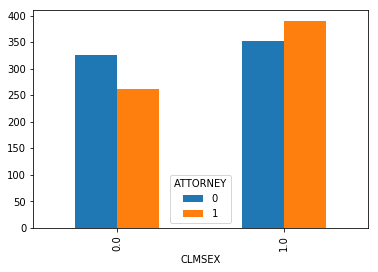

In [21]:
pd.crosstab(claimants.CLMSEX,claimants.ATTORNEY).plot(kind="bar")


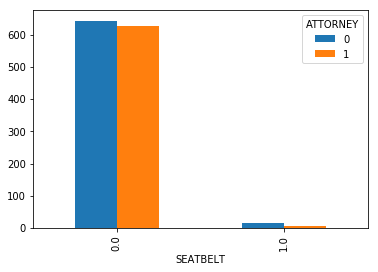

In [23]:
pd.crosstab(claimants.SEATBELT,claimants.ATTORNEY).plot(kind="bar")


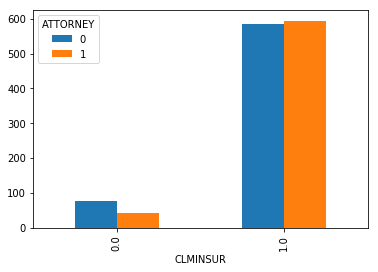

In [22]:
pd.crosstab(claimants.CLMINSUR,claimants.ATTORNEY).plot(kind='bar')


# #Count plot.

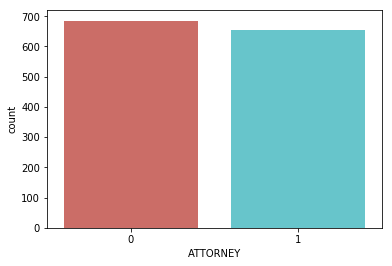

In [8]:
sb.countplot(x="ATTORNEY",data=claimants,palette="hls") # x should be the data.


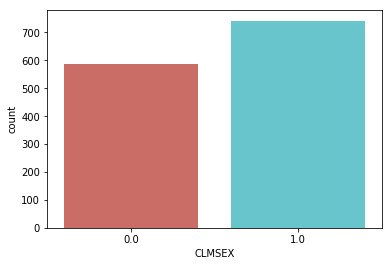

In [16]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")


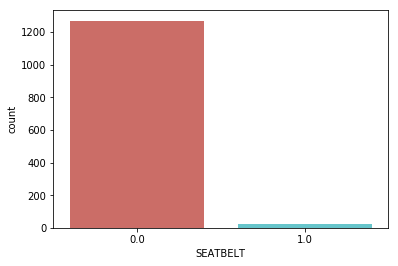

In [18]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")


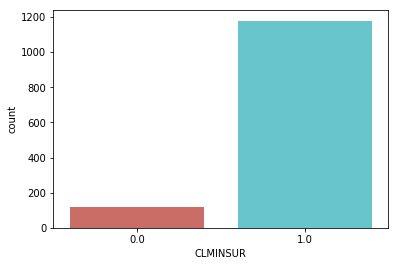

In [20]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")


# -->Now EDA on 'count_cols'.

##### Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns


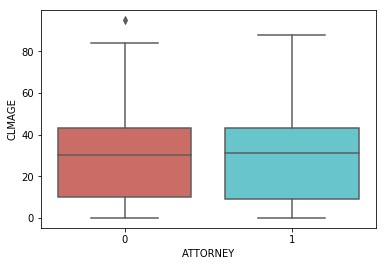

In [25]:
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")



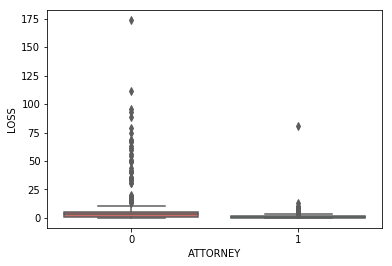

In [26]:
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")


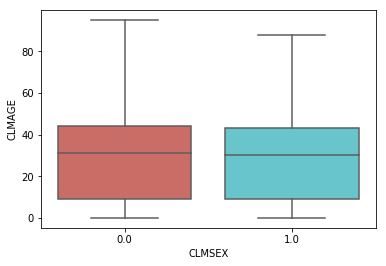

In [27]:
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")


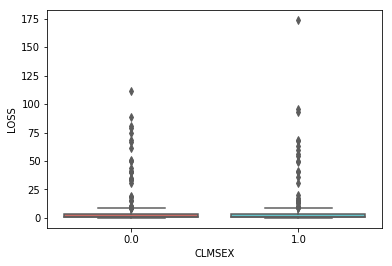

In [28]:
sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")


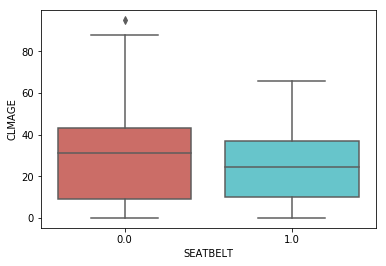

In [29]:
sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")


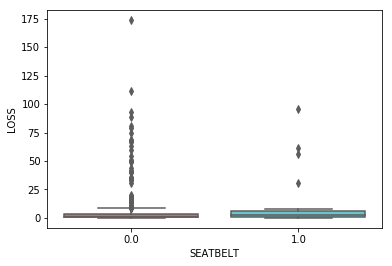

In [30]:
sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")


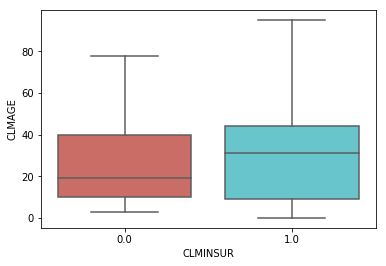

In [31]:
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")


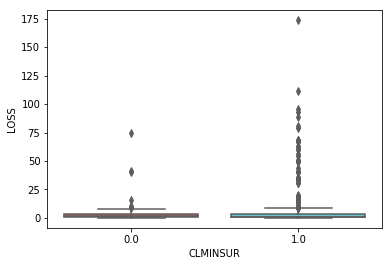

In [32]:
sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")


# | DATA CLEANING |

In [33]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [34]:
claimants.head()

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0         0     0.0       1.0       0.0    50.0  34.940
1         1     1.0       0.0       0.0    18.0   0.891
2         1     0.0       1.0       0.0     5.0   0.330
3         0     0.0       1.0       1.0    31.0   0.037
4         1     0.0       1.0       0.0    30.0   0.038

### CLMAGE needs to be imputed with 'mean'  &  CLMSEX, CLMINSUR, SEATBELT needs to be imputed with their 'modes' as they are categorical.

In [35]:
claimants.iloc[:,1:4] = claimants.iloc[:,1:4].apply(lambda x:x.fillna(x.value_counts().index[0]))
#dataset.column.value_counts().index[0]---->Gives us the 'mode' in the column. 


In [36]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [38]:
claimants.shape

(1340, 6)

In [39]:
#claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1
#claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1
#claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0
#claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1

#The above also can be used to impute mode into cat_cols

claimants.CLMAGE.fillna(claimants.CLMAGE.mean(),inplace=True) 

In [40]:
claimants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# | MODEL BUILDING |

In [43]:
from sklearn.linear_model import LogisticRegression

claimants.shape


(1340, 6)

In [48]:
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0] 
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
X.head()

CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0     0.0       1.0       0.0    50.0  34.940
1     1.0       0.0       0.0    18.0   0.891
2     0.0       1.0       0.0     5.0   0.330
3     0.0       1.0       1.0    31.0   0.037
4     0.0       1.0       0.0    30.0   0.038

In [50]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [55]:
classifier.coef_ # coefficients of features 


array([[ 0.31620084,  0.50087141, -0.52878258,  0.00657581, -0.32259809]])

In [56]:
classifier.predict_proba (X) # Probability values 


array([[9.99974219e-01, 2.57808231e-05],
       [4.94202232e-01, 5.05797768e-01],
       [4.24737596e-01, 5.75262404e-01],
       ...,
       [2.85436327e-01, 7.14563673e-01],
       [6.85685540e-01, 3.14314460e-01],
       [3.38841623e-01, 6.61158377e-01]])

In [57]:
y_pred = classifier.predict(X)

In [58]:
claimants["y_pred"] = y_pred # creation of new column

In [59]:
claimants.head()

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS  y_pred
0         0     0.0       1.0       0.0    50.0  34.940       0
1         1     1.0       0.0       0.0    18.0   0.891       1
2         1     0.0       1.0       0.0     5.0   0.330       1
3         0     0.0       1.0       1.0    31.0   0.037       1
4         1     0.0       1.0       0.0    30.0   0.038       1

FINDING THE PROBABILITIES OF 0's and 1's in the outputs, given the inputs

In [60]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))


In [61]:
y_prob

0         1
0     0.999974  0.000026
1     0.494202  0.505798
2     0.424738  0.575262
3     0.489985  0.510015
4     0.363097  0.636903
5     0.304999  0.695001
6     0.669348  0.330652
7     0.658786  0.341214
8     0.308801  0.691199
9     0.389154  0.610846
10    0.742775  0.257225
11    0.996597  0.003403
12    0.529554  0.470446
13    0.323210  0.676790
14    0.291046  0.708954
15    0.441680  0.558320
16    0.257615  0.742385
17    0.374303  0.625697
18    0.402115  0.597885
19    0.643507  0.356493
20    0.593829  0.406171
21    0.287480  0.712520
22    0.993865  0.006135
23    0.406671  0.593329
24    0.924621  0.075379
25    0.387229  0.612771
26    0.325268  0.674732
27    0.438739  0.561261
28    0.375355  0.624645
29    0.408098  0.591902
...        ...       ...
1310  0.339793  0.660207
1311  0.736377  0.263623
1312  0.978385  0.021615
1313  0.396258  0.603742
1314  0.404092  0.595908
1315  0.481741  0.518259
1316  0.448422  0.551578
1317  0.672039  0.327961
1318  0.297883  0.702117
1319  0.412324  0.587676
1320  0.330532  0.669468
1321  0.632972  0.367028
1322  0.337624  0.662376
1323  0.732838  0.267162
1324  0.842220  0.157780
1325  0.567092  0.432908
1326  0.373503  0.626497
1327  0.270808  0.729192
1328  0.415820  0.584180
1329  0.323541  0.676459
1330  0.832746  0.167254
1331  0.399777  0.600223
1332  0.320317  0.679683
1333  0.332001  0.667999
1334  0.314537  0.685463
1335  0.406618  0.593382
1336  0.549736  0.450264
1337  0.285436  0.714564
1338  0.685686  0.314314
1339  0.338842  0.661158

[1340 rows x 2 columns]

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[435 250]
 [147 508]]


In [69]:
pd.crosstab(y_pred,Y)

ATTORNEY    0    1
row_0             
0         435  147
1         250  508

In [80]:
accuracy=metrics.accuracy_score(Y, y_pred)

In [81]:
accuracy

0.7037313432835821